In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sympy import *

In [3]:
var('t, A, B, C, y, v, t_0', real=True)
# var('t, A, B, C, y, v, t_0')

(t, A, B, C, y, v, t_0)

In [4]:
var("t, t_0, M, eta, v, x, tau, gamma", real=True)
# var("t, t_0, M, eta, v, x, tau")

(t, t_0, M, eta, v, x, tau, gamma)

# compare their expressions https://arxiv.org/abs/0710.0158

In [5]:
# equation 39 rearanged in terms of tau
eta * (t_0 - t) / M * Rational(1,5)

eta*(-t + t_0)/(5*M)

In [6]:
256/4

64.0

In [7]:
64**(1/4)

2.8284271247461903

In [8]:
2.*sqrt(2.)

2.82842712474619

In [9]:
# tau = 
tau_expr = Rational(1,64)*x**-4 * (
    1
    + Rational(487,126)*x
    - Rational(32,5)*pi*x**Rational(3,2)
    + Rational(2349439,254016)*x**2
)

In [10]:
tau_expr.subs({x:0.1}).evalf()

131.747821823253

In [36]:
x_arr = np.arange(0.0001, 0.1, 0.0001/2)

In [38]:
x_arr.shape

(1998,)

In [39]:
tau_arr = np.array([tau_expr.subs({x:x_}).evalf() for x_ in x_arr], dtype=float)

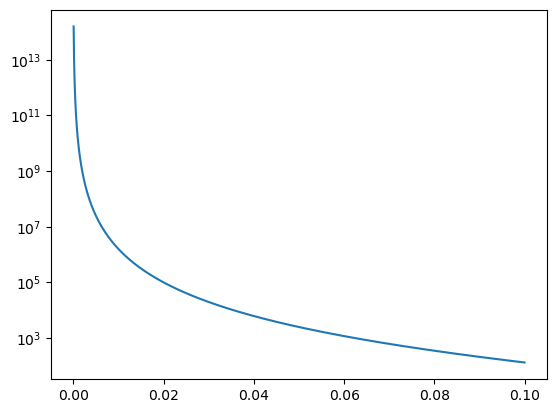

In [40]:
plt.plot(x_arr, tau_arr)
plt.yscale('log')

In [41]:
# equ. 43
# x = 
# x_expr = Rational(1,4)*tau**Rational(-1,4) * ( 1 + Rational(487,2016)*tau**Rational(-1,4) - Rational(1,5)*pi*tau**Rational(-3,8)  )
x_expr = Rational(1,4)*tau**Rational(-1,4) * (
    1
    + Rational(487,2016)*tau**Rational(-1,4)
    - Rational(1,5)*pi*tau**Rational(-3,8)
    + Rational(1875101,16257024)*tau**Rational(-1,2)
)

In [42]:
x_arr_2 = np.array([x_expr.subs({tau:t_}).evalf() for t_ in tau_arr], dtype=float)

In [43]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [44]:
# we can check the inversion by tau(x_arr_2)
# but then intpolating onto x_arr
tau_arr_2 = np.array([tau_expr.subs({x:x_}).evalf() for x_ in x_arr_2], dtype=float)

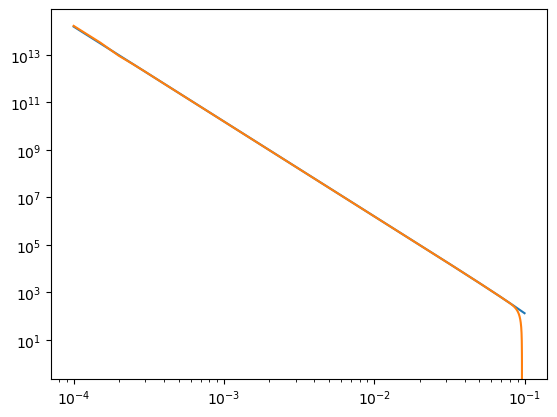

In [45]:
plt.plot(x_arr, tau_arr)
plt.plot(x_arr, IUS(x_arr_2, tau_arr_2)(x_arr))
plt.yscale('log')
plt.xscale('log')

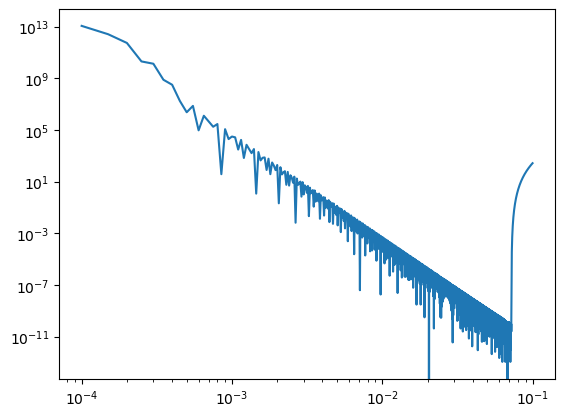

In [46]:
plt.plot(x_arr, np.abs(tau_arr-IUS(x_arr_2, tau_arr_2)(x_arr)))
plt.yscale('log')
plt.xscale('log')

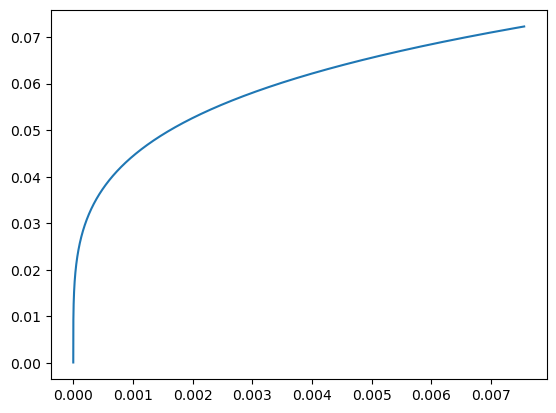

In [467]:
plt.plot(1/tau_arr, x_arr_2)

In [447]:
# compare

In [468]:
plt.plot(x_arr, 1/tau_arr)
plt.plot(x_arr_2, 1/tau_arr)
plt.yscale('log')
plt.xscale('log')

In [469]:
plt.plot(x_arr, 1/tau_arr)
plt.plot(x_arr_2, 1/tau_arr)
plt.yscale('log')
# plt.xscale('log')

In [47]:
rhs = (
    1
    +
    (Rational(743,252) + Rational(11,3)*eta)*x
    -
    (Rational(32,5)*pi)*x**Rational(3,2)
    +
    (Rational(3058673,508032) + Rational(5429,504)*eta + Rational(617,72)*eta**2)*x**2
)**Rational(1,4)

rhs_expansion = series(rhs, x, 0, Rational(6,2)).removeO().subs({x:tau**Rational(-1,4)/4}).expand().collect(tau)
# rhs_expansion = series(rhs, x, 0).removeO().subs({x:tau**Rational(-1,4)/4}).expand().collect(tau)
rhs_expansion

1 + (127*eta**2/2304 + 895*eta/21504 + 701263/16257024)/sqrt(tau) + (11*eta/48 + 743/4032)/tau**(1/4) - pi/(5*tau**(3/8)) + (11*pi*eta/80 + 743*pi/6720)/tau**(5/8)

In [48]:
(rhs_expansion.args[1] * sqrt(tau)).subs({eta:Rational(1,4)})

487*pi/(3360*tau**(1/8))

In [49]:
(rhs_expansion.args[1] * sqrt(tau)).subs({eta:Rational(1,4)}).evalf()

0.455343935207806/tau**0.125

In [50]:
Rational(1875101,16257024)

1875101/16257024

In [51]:
Rational(1875101,16257024).evalf()

0.115340975076373

In [52]:
# mine?
# rhs_expansion

x_expr_mine = Rational(1,4)*tau**Rational(-1,4) * rhs_expansion

In [53]:
x_expr.subs({tau:1000}).evalf()

0.0444342056335254

In [54]:
x_expr_mine.subs({eta:Rational(1,4)}).subs({tau:1000}).evalf()

0.0446221149501038

In [55]:
x_arr_mine = np.array([x_expr_mine.subs({tau:t_, eta:Rational(1,4)}).evalf() for t_ in tau_arr], dtype=float)

In [56]:
plt.plot(x_arr, 1/tau_arr)
plt.plot(x_arr_2, 1/tau_arr)
plt.plot(x_arr_mine, 1/tau_arr, ls='--')
plt.yscale('log')
# plt.xscale('log')

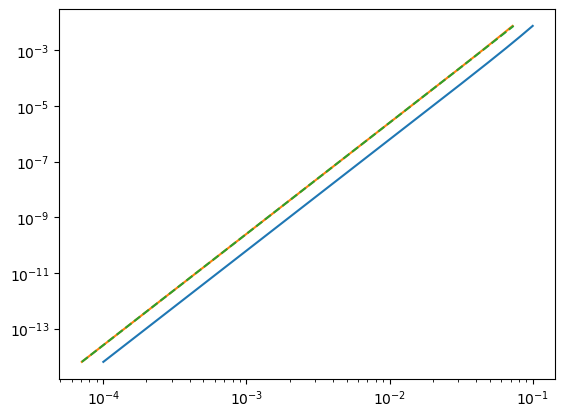

In [57]:
plt.plot(x_arr, 1/tau_arr)
plt.plot(x_arr_2, 1/tau_arr)
plt.plot(x_arr_mine, 1/tau_arr, ls='--')
plt.yscale('log')
plt.xscale('log')

In [58]:
(x_arr_2-x_arr_mine)[:20]

array([2.86708144e-13, 9.34671977e-13, 2.14961905e-12, 4.08505803e-12,
       6.88177881e-12, 1.06692324e-11, 1.55665400e-11, 2.16832727e-11,
       2.91200786e-11, 3.79692010e-11, 4.83149169e-11, 6.02339142e-11,
       7.37956197e-11, 8.90624902e-11, 1.06090271e-10, 1.24928226e-10,
       1.45619351e-10, 1.68200564e-10, 1.92702878e-10, 2.19151568e-10])

In [59]:
print(x_arr_2[:10])
print(x_arr_mine[:10])

[7.07088207e-05 1.06061910e-04 1.41414164e-04 1.76765606e-04
 2.12116259e-04 2.47466144e-04 2.82815278e-04 3.18163679e-04
 3.53511363e-04 3.88858345e-04]
[7.07088204e-05 1.06061909e-04 1.41414161e-04 1.76765602e-04
 2.12116252e-04 2.47466133e-04 2.82815263e-04 3.18163658e-04
 3.53511334e-04 3.88858307e-04]


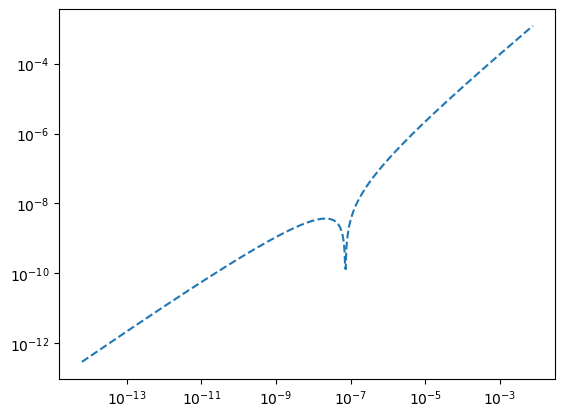

In [60]:
# plt.plot(tau_arr, x_arr)
# plt.plot(tau_arr, )
plt.plot(1/tau_arr, np.abs(x_arr_2-x_arr_mine), ls='--')
plt.yscale('log')
plt.xscale('log')

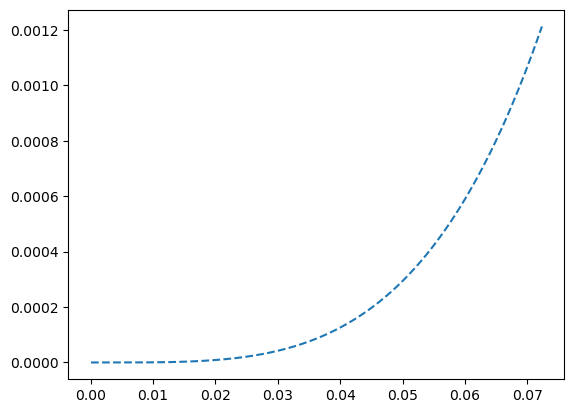

In [61]:
# plt.plot(tau_arr, x_arr)
# plt.plot(tau_arr, )
plt.plot(x_arr_2, np.abs(x_arr_2-x_arr_mine), ls='--')
# plt.yscale('log')
# plt.xscale('log')

In [62]:
# plt.plot(tau_arr, x_arr)
# plt.plot(tau_arr, )
plt.plot(x_arr_2, np.abs(x_arr_2-x_arr_mine), ls='--')
# plt.yscale('log')
plt.xscale('log')

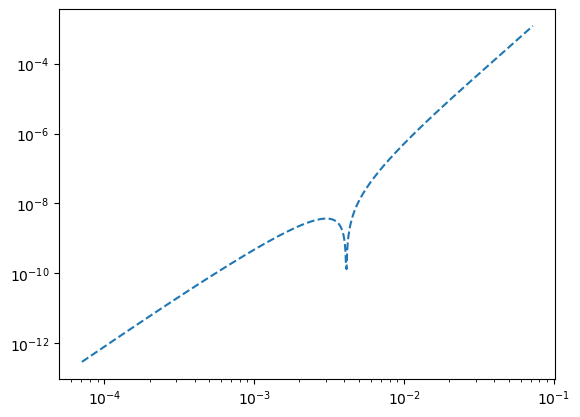

In [63]:
# plt.plot(tau_arr, x_arr)
# plt.plot(tau_arr, )
plt.plot(x_arr_2, np.abs(x_arr_2-x_arr_mine), ls='--')
plt.yscale('log')
plt.xscale('log')

In [64]:
# we can check the inversion by tau(x_arr_2)
# but then intpolating onto x_arr
tau_arr_2_mine = np.array([tau_expr.subs({x:x_}).evalf() for x_ in x_arr_mine], dtype=float)

In [65]:
plt.plot(x_arr, tau_arr)
plt.plot(x_arr, IUS(x_arr_2, tau_arr_2)(x_arr))
plt.plot(x_arr, IUS(x_arr_mine, tau_arr_2_mine)(x_arr))
plt.yscale('log')
plt.xscale('log')

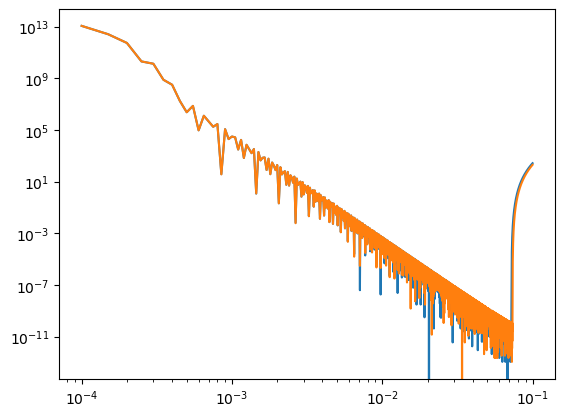

In [66]:
plt.plot(x_arr, np.abs(tau_arr-IUS(x_arr_2, tau_arr_2)(x_arr)))
plt.plot(x_arr, np.abs(tau_arr-IUS(x_arr_mine, tau_arr_2_mine)(x_arr)))
plt.yscale('log')
plt.xscale('log')

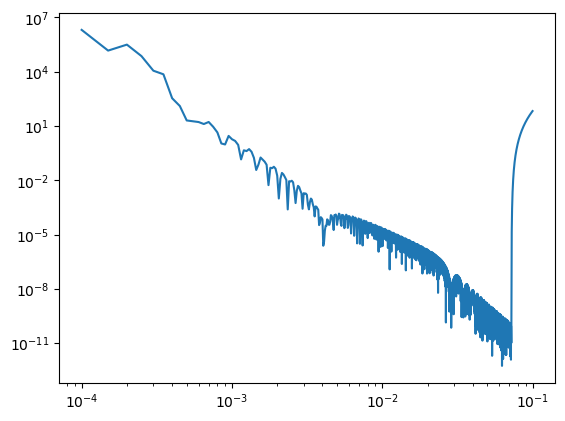

In [67]:
plt.plot(x_arr, np.abs(IUS(x_arr_2, tau_arr_2)(x_arr)-IUS(x_arr_mine, tau_arr_2_mine)(x_arr)))
plt.yscale('log')
plt.xscale('log')

In [68]:
plt.plot(x_arr, IUS(x_arr_2, tau_arr_2)(x_arr))
plt.plot(x_arr, IUS(x_arr_mine, tau_arr_2_mine)(x_arr))
plt.yscale('log')
plt.xscale('log')

# old

In [18]:
rhs = (
    1
    +
    (Rational(743,252) + Rational(11,3)*eta)*x
    -
    (Rational(32,5)*pi)*x**Rational(3,2)
)**Rational(1,4)

series(rhs, x, 0, Rational(4,2)).removeO().subs({x:tau**Rational(-1,4)/4}).expand().collect(tau)

1 + (11*eta/48 + 743/4032)/tau**(1/4) - pi/(5*tau**(3/8))

In [19]:
# x = 
tau**Rational(-1,4)/4

1/(4*tau**(1/4))

In [87]:
rhs = (
    1
    +
    (Rational(743,252) + Rational(11,3)*eta)*x
    -
    (Rational(32,5)*pi)*x**Rational(3,2)
    +
    (Rational(3058673,508032) + Rational(5429,504)*eta + Rational(617,72)*eta**2)*x**2
)**Rational(1,4)

rhs_expansion = series(rhs, x, 0, Rational(5,2)).removeO().subs({x:tau**Rational(-1,4)/4}).expand().collect(tau)
rhs_expansion

1 + (127*eta**2/2304 + 895*eta/21504 + 701263/16257024)/sqrt(tau) + (11*eta/48 + 743/4032)/tau**(1/4) - pi/(5*tau**(3/8))

In [224]:
gamma

gamma

In [75]:
Rational(1,8)-1

-7/8

In [76]:
Rational(1,8) * (Rational(1,8)-1) / 2

-7/128

In [77]:
(1 + x)**Rational(1,8)

(x + 1)**(1/8)

In [78]:
((1 + x)**Rational(1,8)).subs({x:1.})

1.09050773266526

In [79]:
series((1 + x)**Rational(1,8), x, 0, 6).removeO().subs({x:1.})

1.09896469116211

In [80]:
series((1 + x)**Rational(1,8), x, 0, 3)

1 + x/8 - 7*x**2/128 + O(x**3)

In [193]:
rhs = (1 + (Rational(743,252) + Rational(11,3)*eta)*x)**Rational(1,4)
series(rhs, x, 0, 2).removeO().subs({x:tau**Rational(-1,4)/4}).expand().collect(tau)

1 + (11*eta/48 + 743/4032)/tau**(1/4)

In [335]:
rhs = (
    1
    +
    (Rational(743,252) + Rational(11,3)*eta)*x
    -
    (Rational(32,5)*pi)*x**Rational(3,2)
    # +
    # (Rational(3058673,508032) + Rational(5429,504)*eta + Rational(617,72)*eta**2)*x**2
    # -
    # (Rational(7729,252) - Rational(13,3)*eta)*pi*x**Rational(5,2)
    # +
    # (
    #     -Rational(10052469856691, 23471078400) + Rational(128,3)*pi**2 + Rational(6848,105)*gamma
    #     +
    #     ( Rational(3147553127, 3048192) - Rational(451,12)*pi**2 ) * eta
    #     - Rational(15211,1728)*eta**2 + Rational(25565,1296)*eta**3 + Rational(3424,105)*ln(16*x)
    # )*x**3
)**Rational(1,4)
# series(rhs, x, 0, 3).removeO().subs({x:tau**Rational(-1,4)/4}).expand().collect(tau).subs({eta:Rational(1,4)})
series(rhs, x, 0, Rational(4,2)).removeO().subs({x:tau**Rational(-1,4)/4}).expand().collect(tau)


#.subs({x:tau**Rational(-1,4)/4}).expand().collect(tau).subs({eta:Rational(1,4)})

1 + (11*eta/48 + 743/4032)/tau**(1/4) - pi/(5*tau**(3/8))

In [287]:
(tau**Rational(-3,4))*tau**Rational(1,4)

1/sqrt(tau)

In [227]:
ln(16*x)

log(16*x)

In [294]:
# from eq 39 of https://arxiv.org/abs/0710.0158
# equal mss case
rhs = (
    1
    +
    Rational(487,126)*x
    -
    (Rational(32,5)*pi)*x**Rational(3,2)
    +
    (Rational(2349439,254016))*x**2
    -
    (Rational(1864, 63)*pi)*x**Rational(5,2)
    +
    (-Rational(999777207379, 5867769600) + Rational(1597,48)*pi**2 + Rational(6848,105)*gamma + Rational(3424,105)*ln(16*x))*x**3
)**Rational(1,4)
series(rhs, x, 0, 3).removeO().subs({x:tau**Rational(-1,4)/4}).expand().collect(tau)

1 + 926425/(16257024*sqrt(tau)) + 487/(2016*tau**(1/4)) - pi/(5*tau**(3/8)) - 869*pi/(10080*tau**(5/8))

In [236]:
Rational(926425, 16257024)*1.

0.0569861371921454

In [234]:
Rational(1875101,16257024)*1.

0.115340975076373

In [246]:
Rational(1875101,16257024)*1./Rational(926425, 16257024)*1.

2.02401813422565

In [239]:
(Rational(19583,254016) + Rational(24401,193536)*eta + Rational(31,288)*eta**2).subs({eta:0.25})

0.115340975076373

In [175]:
rhs = (
    Rational(1,2)*tau**Rational(-1,8)
    *
    (
        1
        +
        (Rational(743,252) + Rational(11,3)*eta)*Rational(1,4)*tau**Rational(-1,4)
    )
)**Rational(2,1)
rhs

(1 + (11*eta/12 + 743/1008)/tau**(1/4))**2/(4*tau**(1/4))

In [176]:
series(rhs, tau)

(924*eta + 743)**2/(4064256*tau**(3/4)) + 1/(4*tau**(1/4)) + (11*eta/24 + 743/2016)/sqrt(tau) + O(tau**6)

In [177]:
powdenest(series(rhs, tau, 0, 4), force=True).collect(tau)

(924*eta + 743)**2/(4064256*tau**(3/4)) + 1/(4*tau**(1/4)) + (11*eta/24 + 743/2016)/sqrt(tau) + O(tau**4)

In [183]:
powdenest(256**Rational(1,4), force=True)

4

In [81]:
# rhs = (
#     Rational(1,2) * tau**Rational(-1,8)
#     *
#     (
#         1
#         +
#         (Rational(743,252) + Rational(11,3)*eta)*Rational(1,4)*tau**Rational(1,4)
#     )**Rational(1,8)
# )
# rhs

In [100]:
# don't include pre-factor just look at (1 + ...)**(1/8)
rhs = (
    (
        1
        +
        (Rational(743,252) + Rational(11,3)*eta)                                            * (Rational(1,2) * tau**Rational(1,8))**2
        +
        (Rational(32,5)*pi)                                                                 * (Rational(1,2) * tau**Rational(1,8))**3
        +
        (Rational(15293365,1016064) + Rational(27145,1008)*eta + Rational(3085,144)*eta**2) * (Rational(1,2) * tau**Rational(1,8))**4
    )**Rational(1,8)
) * 2
rhs

2*(4*pi*tau**(3/8)/5 + tau**(1/4)*(11*eta/3 + 743/252)/4 + sqrt(tau)*(3085*eta**2/144 + 27145*eta/1008 + 15293365/1016064)/16 + 1)**(1/8)

In [101]:
(series(rhs, tau, 0, Rational(5,8)))

2 + sqrt(tau)*(3085*eta**2/9216 + 27145*eta/64512 - 7*(11*eta/12 + 743/1008)**2/64 + 15293365/65028096) + tau**(1/4)*(11*eta/48 + 743/4032) + pi*tau**(3/8)/5 + O(tau**(5/8))

In [102]:
(series(rhs, tau, 0, Rational(6,8))).expand().collect(tau)

2 + sqrt(tau)*(373*eta**2/1536 + 105659*eta/387072 + 1904837/10838016) + tau**(1/4)*(11*eta/48 + 743/4032) + pi*tau**(3/8)/5 + tau**(5/8)*(-77*pi*eta/480 - 743*pi/5760) + O(tau**(3/4))

In [103]:
((series(rhs, tau, 0, Rational(4,8))) * (Rational(1,4)*tau**Rational(-1,4)))

(2 + tau**(1/4)*(11*eta/48 + 743/4032) + pi*tau**(3/8)/5 + O(sqrt(tau)))/(4*tau**(1/4))

In [86]:
Rational(1,256)**Rational(1,8)

1/2

In [87]:
# rhs = v**-1 * Rational(1,2) * (1 + (Rational(743, 252) + Rational(11,3)*eta)*v**2) ** Rational(1,8)
# rhs

In [88]:
rhs = (
    Rational(1,2)
    *
    (
        1
        +
        (Rational(743, 252) + Rational(11,3)*eta)*v**2
        +
        Rational(32,5)*pi*v**3
        +
        (Rational(3058673,1016064) + Rational(27145,1008)*eta + Rational(3085,144)*eta**2)*v**4
    )
    ** Rational(1,8))
rhs

(v**4*(3085*eta**2/144 + 27145*eta/1008 + 3058673/1016064) + 32*pi*v**3/5 + v**2*(11*eta/3 + 743/252) + 1)**(1/8)/2

In [89]:
(series(rhs, v, 0, 6)).expand().collect(v) * 2

1 + 2*v**2*(11*eta/48 + 743/4032) + 4*pi*v**3/5 + 2*v**4*(373*eta**2/384 + 105659*eta/96768 - 402835/8128512) + 2*v**5*(-77*pi*eta/60 - 743*pi/720) + O(v**6)

In [90]:
(series(rhs, v, 0, 5)).expand().collect(v).subs({'eta':Rational(1,4)}) * 2

1 + 2*v**2*(11*eta/48 + 743/4032) + 4*pi*v**3/5 + 2*v**4*(373*eta**2/384 + 105659*eta/96768 - 402835/8128512) + O(v**5)

In [91]:
(series(rhs, v, 0, 5)).expand().collect(v).subs({'eta':Rational(1,4)})

1/2 + v**2*(11*eta/48 + 743/4032) + 2*pi*v**3/5 + v**4*(373*eta**2/384 + 105659*eta/96768 - 402835/8128512) + O(v**5)

In [92]:
(series(rhs/v, v, 0, 5)/2).expand().collect(v)

1/(4*v) + v*(11*eta/96 + 743/8064) + pi*v**2/5 + v**3*(373*eta**2/768 + 105659*eta/193536 - 402835/16257024) + v**4*(-77*pi*eta/120 - 743*pi/1440) + O(v**5)

In [93]:
(series(rhs, v, 0, 5)/v).expand().collect(v)

1/(2*v) + v*(11*eta/48 + 743/4032) + 2*pi*v**2/5 + v**3*(373*eta**2/384 + 105659*eta/96768 - 402835/8128512) + O(v**4)

In [94]:
(x**Rational(1,8)) ** 2

x**(1/4)

In [95]:
((series(rhs/v, v, 0, 3)).expand().collect(v).subs({v:Rational(1,2)*tau**(Rational(1,8))})) / (tau**Rational(-1,4)/10).expand().simplify()

10*tau**(1/4)*(tau**(-1/8) + pi*tau**(1/4)/10 + tau**(1/8)*(11*eta/48 + 743/4032)/2 + O(tau**(3/8)))

In [114]:
rhs0 = 1 / v**8 * (1 + (Rational(743, 252) + Rational(11,3)*eta)*v**2)
# rhs0 = v**-8 * (1 + (Rational(743, 252) + Rational(11,3)*eta)*v**2)

In [115]:
rhs0

(v**2*(11*eta/3 + 743/252) + 1)/v**8

In [116]:
rhs0

(v**2*(11*eta/3 + 743/252) + 1)/v**8

In [117]:
rhs = rhs0
# rhs = rhs0.simplify()

In [118]:
rhs

(v**2*(11*eta/3 + 743/252) + 1)/v**8

In [119]:
(1/(1.2234234234**8))**(-1/8)

1.2234234234

In [120]:
(1/(1.2234234234**8))**(1/8)

0.8173784978065183

In [121]:
(1.2234234234**-8)**(-1/8)

1.2234234234

In [122]:
rhs = (rhs)**Rational(-1/8)

In [123]:
rhs

((v**2*(11*eta/3 + 743/252) + 1)/v**8)**(-1/8)

In [124]:
series(rhs, v, 0, 4)

v + v**3*(-11*eta/24 - 743/2016) + O(v**4)

In [125]:
series(rhs, v, 0, 4).expand().collect(v)

v + v**3*(-11*eta/24 - 743/2016) + O(v**4)

# t(x) from https://arxiv.org/abs/0710.0158

In [182]:
var('x, tau')

(x, tau)

In [130]:
#t(x): equ 39
rhs = t_0 - Rational(5,64)*M*x**(-4) * (1 + Rational(487,126)*x)
rhs

-5*M*(487*x/126 + 1)/(64*x**4) + t_0

In [136]:
eq = Eq(t, rhs)

In [137]:
eq

Eq(t, -5*M*(487*x/126 + 1)/(64*x**4) + t_0)

In [151]:
(0.25*(t_0 - t) / (5*M))

(-0.25*t + 0.25*t_0)/(5*M)

In [159]:
aa = (0.25*(t_0 - t) / (5*M))**Rational(-1,4)

In [174]:
# tau = Rational(0.25, 5) / M * (t_0)
tau = 0.25 * (t_0-t) / (5*M)

In [175]:
tau

(-0.25*t + 0.25*t_0)/(5*M)

In [176]:
tau**Rational(-1,4)

5**(1/4)/((-0.25*t + 0.25*t_0)/M)**(1/4)

In [177]:
aa.subs({'t':1, 't_0':2, 'M':1})

1.4142135623731*5**(1/4)

In [178]:
(tau**Rational(-1,4)).subs({'t':1, 't_0':2, 'M':1})

1.4142135623731*5**(1/4)

In [184]:
del tau

In [185]:
var('tau')

tau

In [186]:
tau

tau

In [187]:
rhs

-5*M*(487*x/126 + 1)/(64*x**4) + t_0

In [188]:
rhs = Rational(1, 64)*x**(-4) * (1 + Rational(487,126)*x)

In [189]:
rhs

(487*x/126 + 1)/(64*x**4)

In [206]:
rhs**Rational(-1,4)

2*sqrt(2)/((487*x/126 + 1)/x**4)**(1/4)

In [221]:
((x**4)**Rational(1,4))

(x**4)**(1/4)

In [216]:
(1.21345**4)**Rational(1,4)

1.21345000000000

In [214]:
(x**-4)**Rational(-1,4)

(x**(-4))**(-1/4)

In [213]:
(1.1234**-4)**Rational(-1,4)

1.12340000000000

In [202]:
series(rhs**Rational(-1,4), x, 0, 4)

2*sqrt(2)*x - 487*sqrt(2)*x**2/252 + 1185845*sqrt(2)*x**3/254016 + O(x**4)

In [226]:
series(rhs**Rational(-1,4), x, 0, 4).expand().collect(2**Rational(1,2)*x)

sqrt(2)*x*(2 - 487*x/252 + 1185845*x**2/254016 + O(x**4))

In [ ]:
# tau**(-1/4) = ^^

In [205]:
Rational(1,64)**Rational(-1,4)

2*sqrt(2)

In [228]:
Rational(-1,4) + Rational(-1,4) 

-1/2

In [227]:
Rational(-1,4) + Rational(-3,8) 

-5/8

# old

In [39]:
rhs = 1/y * (1 + C*y**Rational(1/4))
rhs

(C*y**(1/4) + 1)/y

In [40]:
series(rhs, y, 0)

1/y + C/y**(3/4) + O(y**6)

In [10]:
eq = Eq(t, rhs)
eq

Eq(t, A - B*(C*y**(1/4) + 1)/y)

In [23]:
rhs_expansion = series(rhs, y, 0)
rhs_expansion

-B/y - B*C/y**(3/4) + A + O(y**6)

In [32]:
rhs_expansion.removeO()

A - B*C/y**(3/4) - B/y

In [2]:
var("t, t_0, M, eta, v")

(t, t_0, M, eta, v)

In [3]:
eq = Eq(t, t_0 - Rational(5,256) * M / (eta*v**8))

In [4]:
sol = solve(eq, v)

In [5]:
rhs = simplify(t_0 - Rational(5,256) * M / (eta*v**8) * (1 + v**2)).expand()
rhs

-5*M/(256*eta*v**6) - 5*M/(256*eta*v**8) + t_0

In [6]:
eq = Eq(t, rhs)

In [7]:
series(rhs, v)

-5*M/(256*eta*v**6) - 5*M/(256*eta*v**8) + t_0

In [8]:
series(t_0 - Rational(5,256) * M / (eta*v**8) * (1 + v**2), v, n=2)

t_0 - 5*M/(256*eta*v**8) - 5*M/(256*eta*v**6) + O(v**2)

In [9]:
# sol = solve(eq, v)

In [10]:
# sol[0]

In [11]:
var('theta')

theta

In [12]:
# time variable

theta = eta / (5*M) * (t_0 - t)

In [13]:
theta

eta*(-t + t_0)/(5*M)

# compositional inverse

In [34]:
var('x, y')

(x, y)

In [58]:
# y
f1 = fps(1 + x + x**2)

In [59]:
f1.truncate(2)

1 + x + O(x**2)

In [66]:
f1.inverse(x).truncate()

1 - x + x**3 - x**4 + O(x**6)

11*eta/(3*v**3) + 743/(252*v**3) + v**(-5)

In [78]:
# y
f1 = fps(v**(-5)*(1 + (Rational(743,252) + Rational(11,3)*eta)*v**2), v)

(11*eta/3 + 743/252)/v**3 + v**(-5)

In [86]:
# y
f1 = fps(expand(v**(-5)*(1 + (Rational(743,252) + Rational(11,3)*eta)*v**2)), v)

In [85]:
f1

11*eta/(3*v**3) + 743/(252*v**3) + v**(-5)

In [89]:
f1 = fps(series(expand(v**(-5)*(1 + (Rational(743,252) + Rational(11,3)*eta)*v**2)), v), v)

In [90]:
f1.truncate()

AttributeError: 'Add' object has no attribute 'truncate'

In [80]:
f1.inverse(v).truncate()

ValueError: Constant coefficient should exist for an inverse of a formal power series to exist.